In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('churn_data.csv')

In [3]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(data.head())

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
data.isnull().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [6]:
data.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


# Dependent Variable: churn

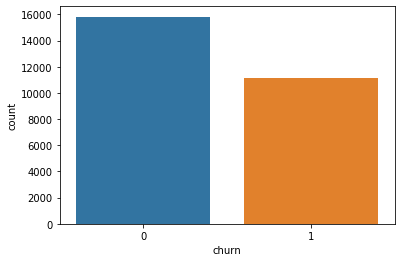

In [7]:
sns.countplot(data.churn)

We have to stop the churning i.e find ways to increase the customers with 'churn' variable = 0

For the we need to figure out which customers should the company focus on more so that the churn rate is decreased

Let's do some analysis and figure out which group of customers have churned

First we will look at the age.

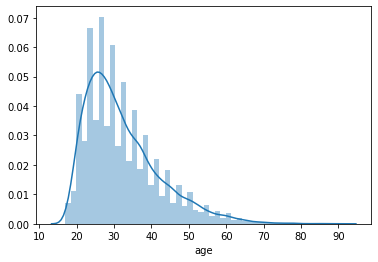

In [8]:
sns.distplot(data.age)

Seems like the majority of customers have age of between 20-40 yrs


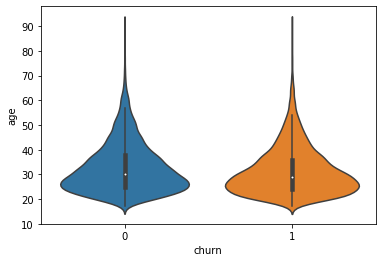

In [9]:
sns.violinplot(x=data.churn, y= data.age)

Okay, so churning is not dependent on age at all. It doesn't matter what age the customer is he/she is as likely to churn as any other customer of any other age.
So we should not focus on any particular age group.

Next let's check the credit score

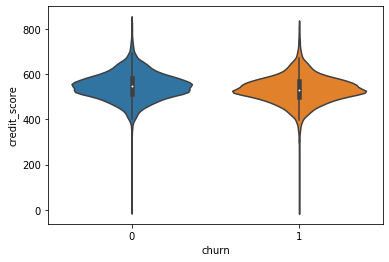

In [10]:
sns.violinplot(data.churn, data.credit_score)

No dependency on credit score

Okay checking all 31 variables one by one is not efficient. So why not just plot them all together.


In [11]:
num_data = data.select_dtypes(exclude='object')

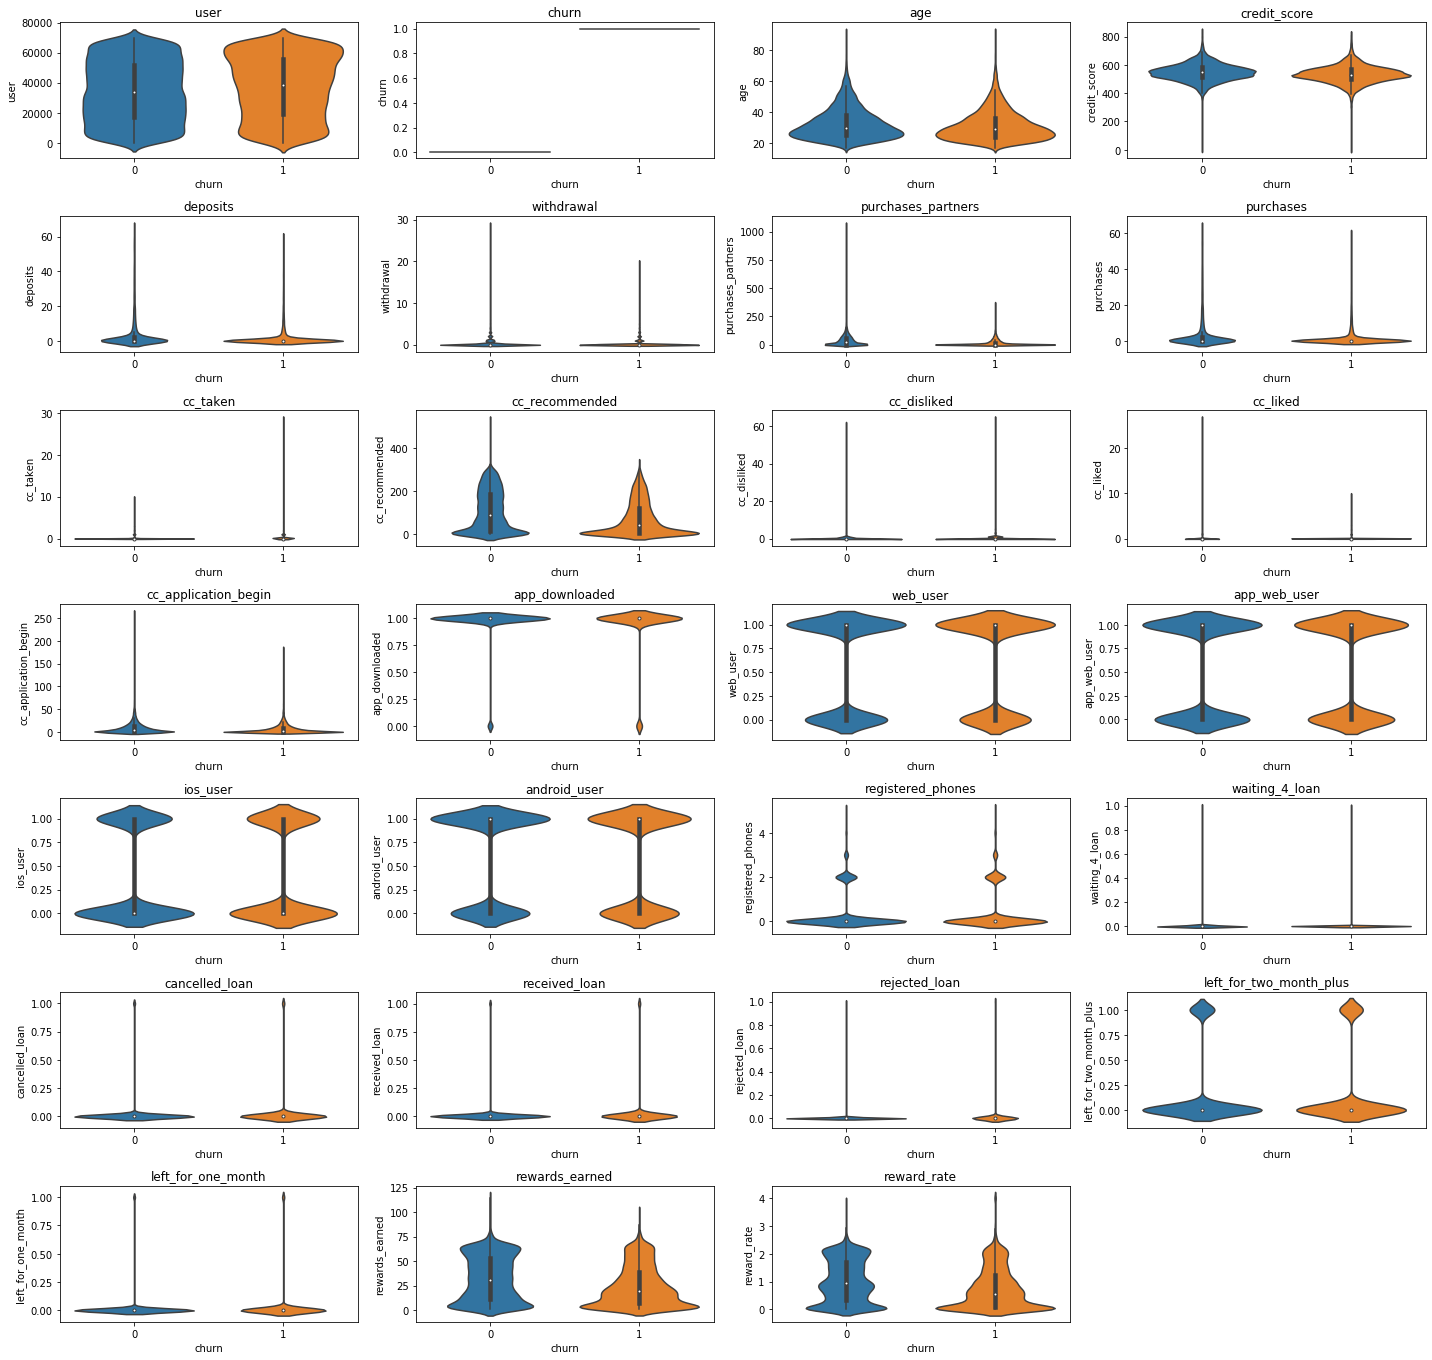

In [12]:
plt.figure(figsize=(20,20))
for i in range(1,num_data.shape[1]):
    plt.subplot(7,4,i)
    fig = plt.gca()
    fig.set_title(num_data.columns.values[i-1])
    sns.violinplot(data.churn,num_data.iloc[:,i-1])
plt.tight_layout(rect=(0,0.03,1,0.98))
    

After seeing the graphs(violin plots) we can see that there is no such variable on which the churning actually depends. There are few variables which we can use to determine the probability to some extent. But other then those few variables the churning customers seem to be ambiguous. 

Variables like deposists, purchases_partners, purchases, cc_taken, cc_recommended, cc_liked, cc_application_begin, app_downloaded,
rejected_loan, reward_rate and reward_earned can be used to determine the churning.

Let's see what the correlation graph tells us.


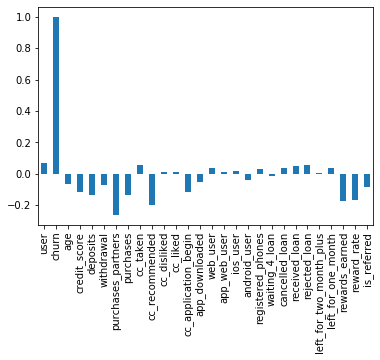

In [13]:
corr = data.corrwith(data.churn)
corr.plot.bar()

Correlation graphs agrees with our assumptions.

BUT even the correlations are not that great so it will be very difficult to find the dependency of churn on these variables and any useful insights.

I'll use this infomartion later on but first let's check the left out categorical variables

In [14]:
obj_data = data.select_dtypes(include="object")

In [15]:
obj_data

,housing,payment_type,zodiac_sign
0,na,Bi-Weekly,Leo
1,R,Weekly,Leo
2,R,Semi-Monthly,Capricorn
3,R,Bi-Weekly,Capricorn
4,na,Bi-Weekly,Aries
...,...,...,...
26995,R,Weekly,Leo
26996,na,Bi-Weekly,Cancer
26997,na,Bi-Weekly,Taurus
26998,na,Semi-Monthly,Aries


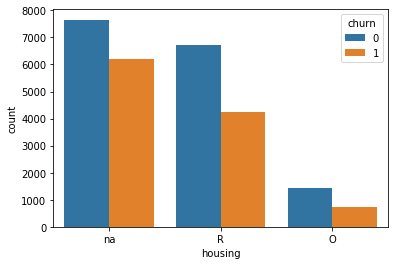

In [16]:
sns.countplot(data.housing, hue = data.churn)

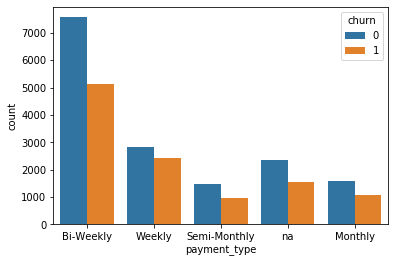

In [17]:
sns.countplot(data.payment_type, hue=data.churn)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

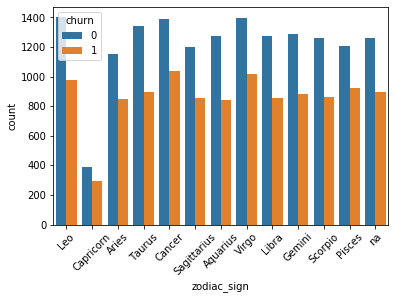

In [18]:
sns.countplot(data.zodiac_sign, hue=data.churn)
plt.xticks(rotation=45)

Nothing useful here

I'll use the pairplot function from seaborn to plot the variables. Hopefully we'll see something interesting.


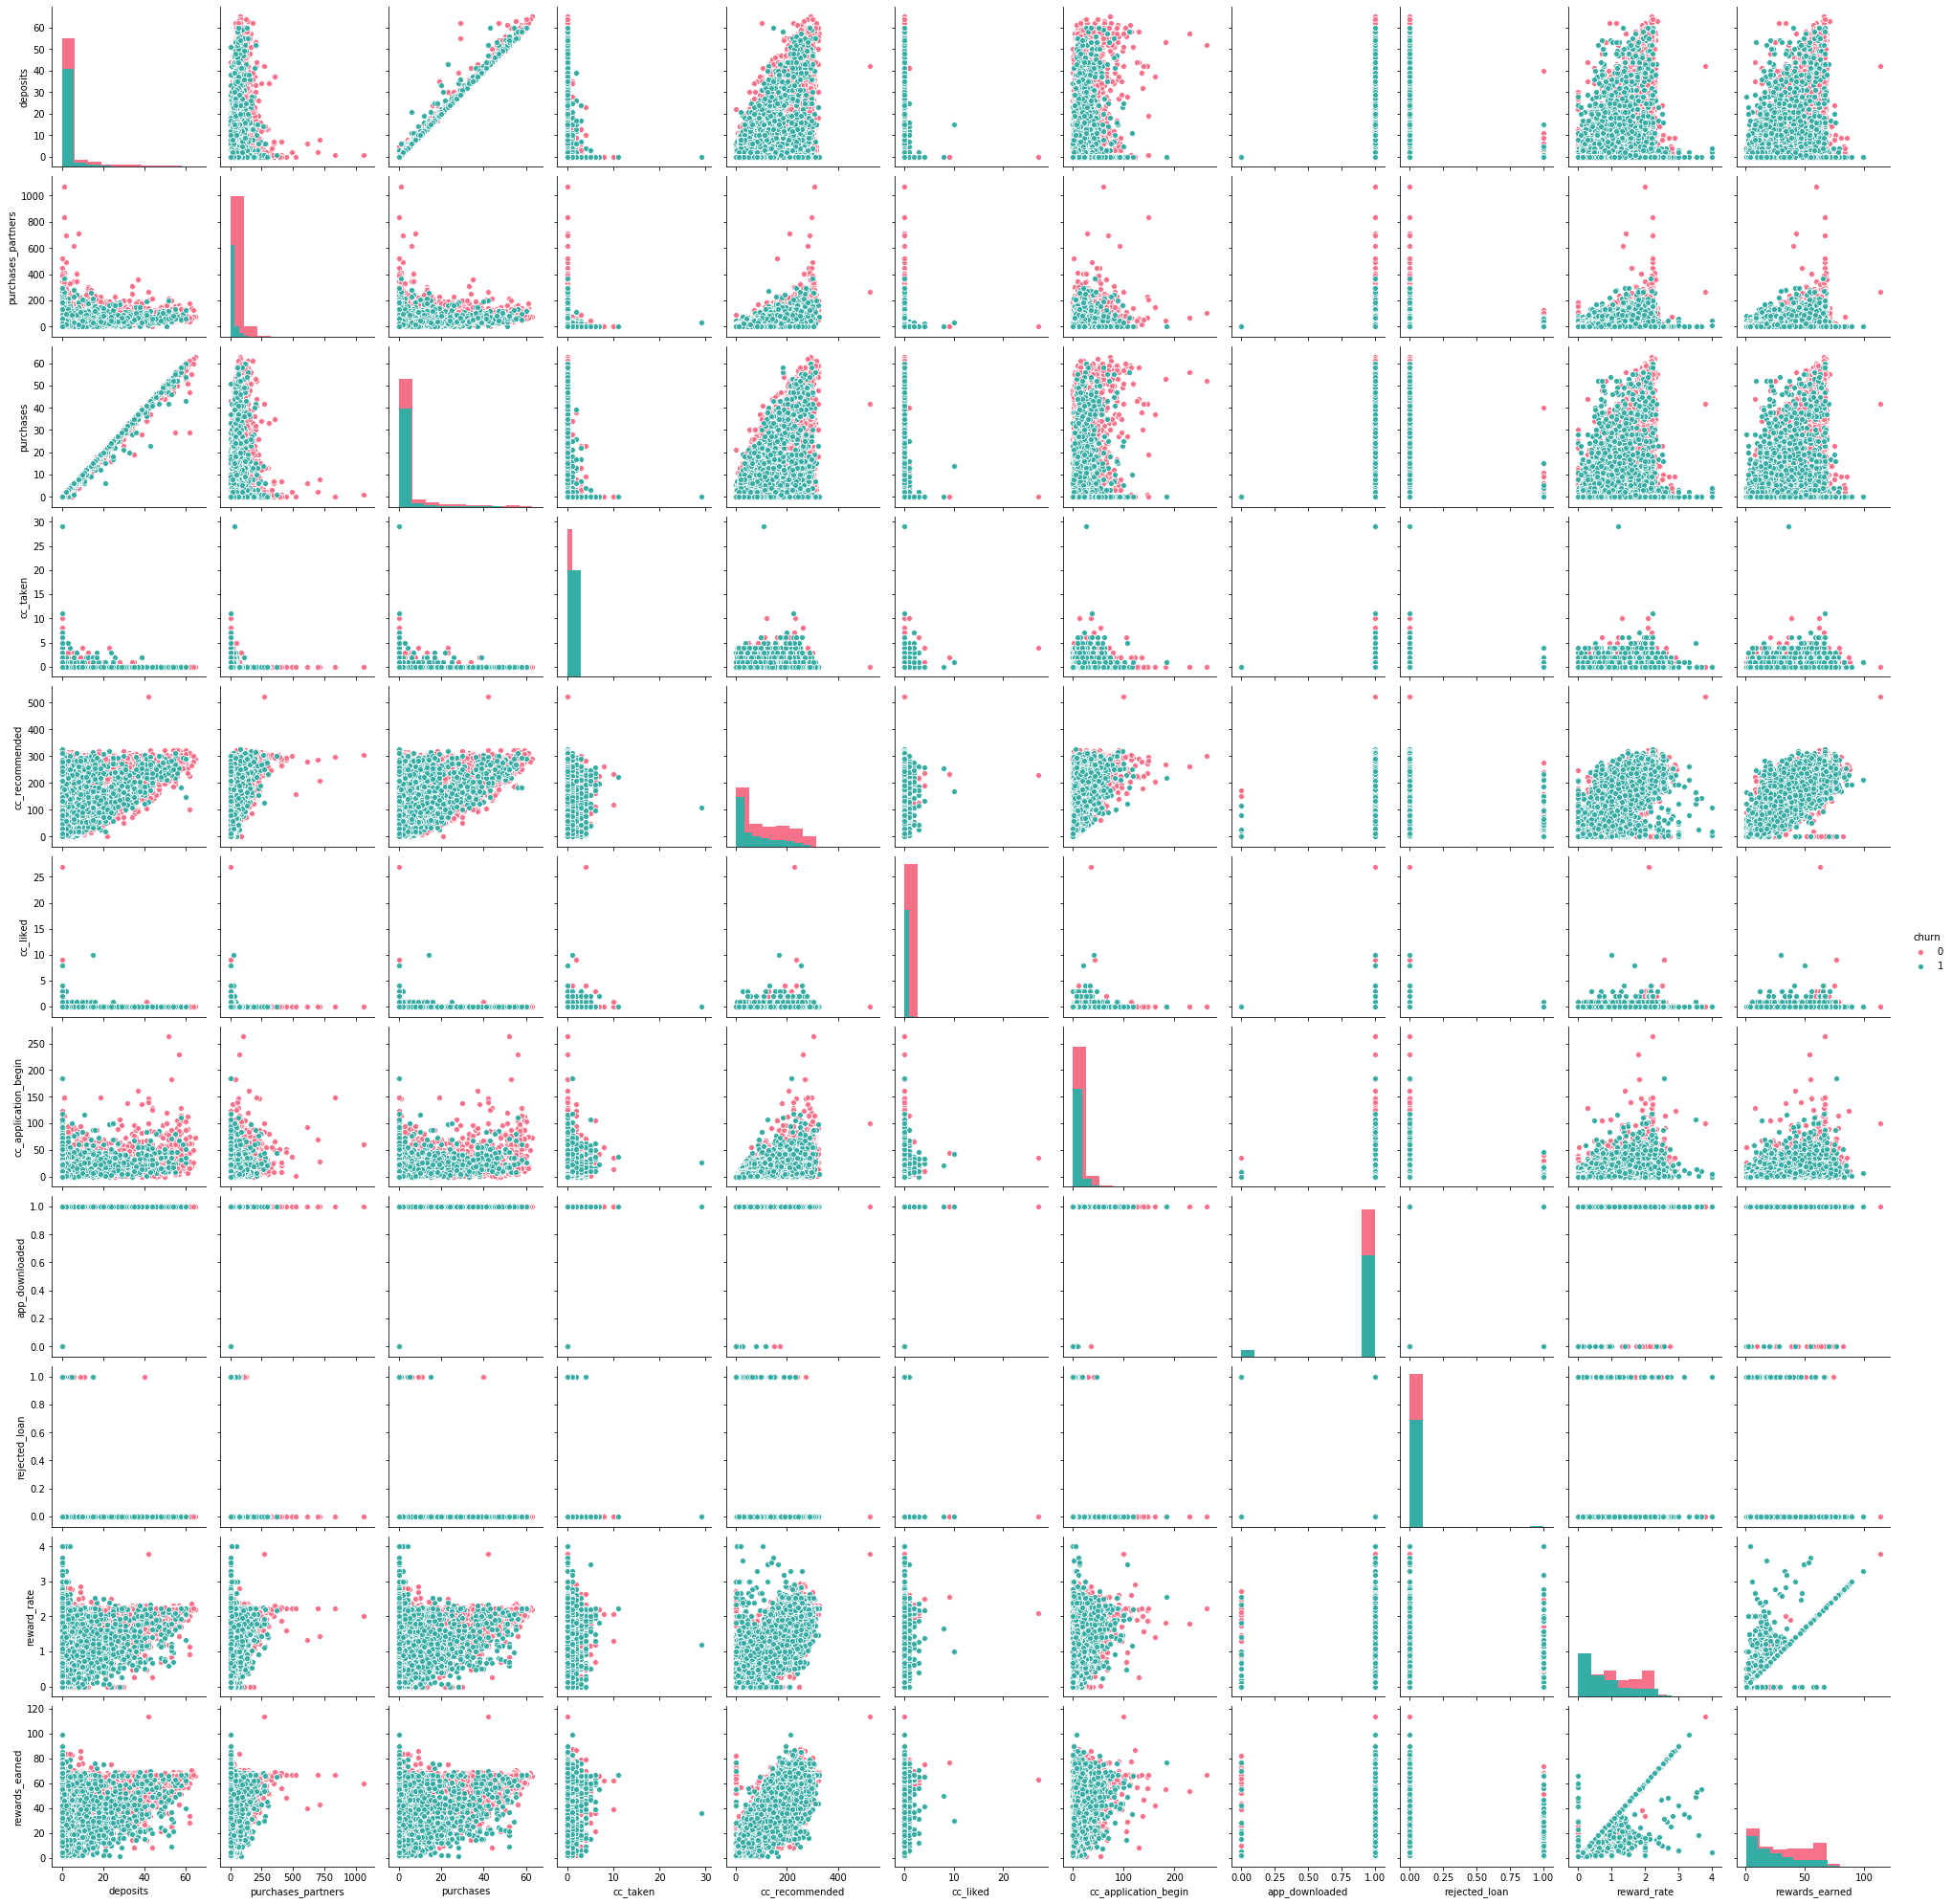

In [19]:
sns.pairplot(num_data,vars = ['deposits', 'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended', 'cc_liked', 'cc_application_begin', 'app_downloaded',
'rejected_loan', 'reward_rate','rewards_earned'], hue='churn', diag_kind='hist',palette="husl")

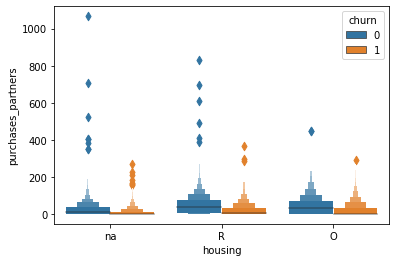

In [20]:
sns.boxenplot(data.housing, data.purchases_partners,hue=data.churn)

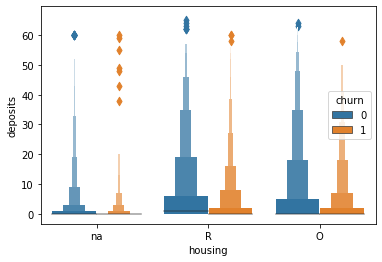

In [21]:
sns.boxenplot(data.housing,data.deposits, hue=data.churn)

Analysis shows that the churning of the customer is not dependent on any one variable. Even after pairing the variables we cant see any particularly useful insight which will help us to identify the churning customers.


However some points to note are:

- Customers having higher purchases_partner are less likely to churn.
- Customers with zero deposit are very likely to churn.
- Customers with less cc_applications are likely to churn.

But these factors are not enough to identify whether the customer will churn or not.


Lastly lets see the correlation between each variables

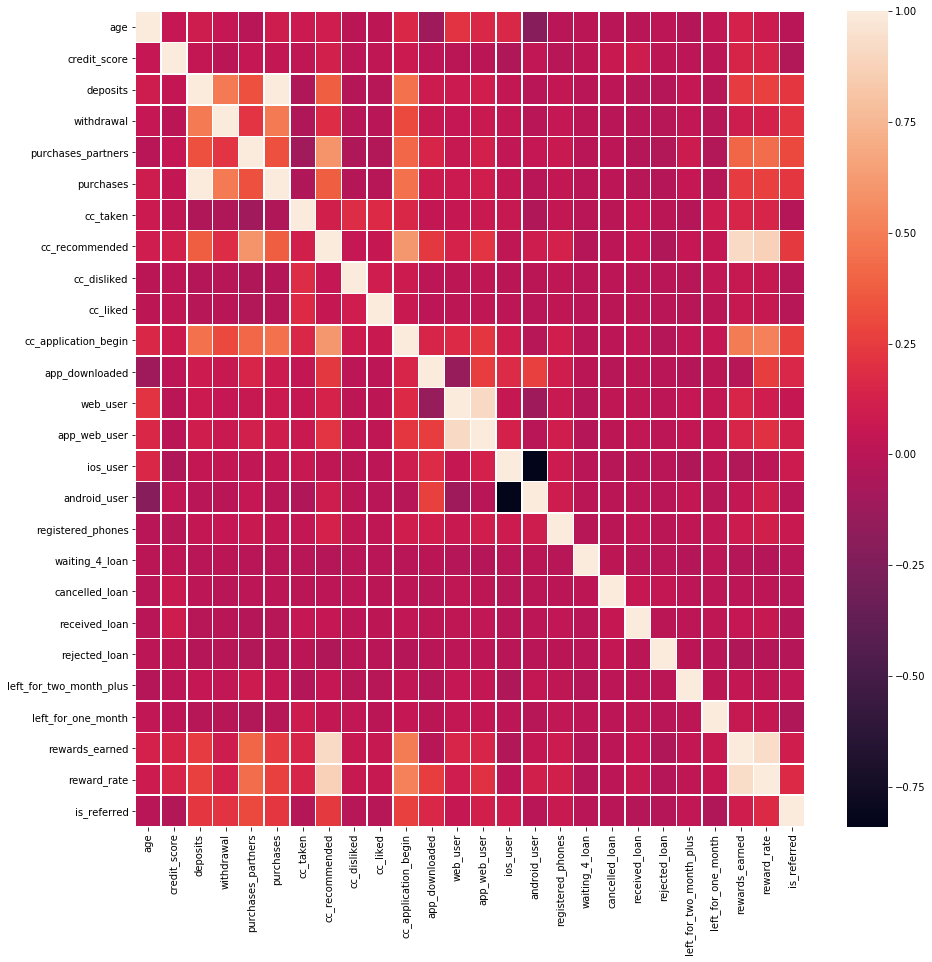

In [50]:
fig , ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.drop(columns=['user', 'churn']).corr(),linewidth = .5, )

# Let's take help of some statistics.

In [31]:
data.shape # total no of customers

(27000, 31)

In [32]:
data[(data.churn==1)].shape # no of customers that churned

(11174, 31)

out of 27000 customers 11174 customers have churned

In [35]:
data[data.deposits==0].shape # no of customers with zero deposit [n(d)]

(18156, 31)

Out of 27000 customers 18156 customers have deposited zero amount

In [37]:
np.size(data[(data.deposits==0) & (data.churn == 1)].churn) # no of customers deposited zero amount and have churned [n(c and d)]

8456

Out of 18156 customers 8456 customers have deposited zero amount and have churned

So let us find out whether the churning of the customer is dependent on the deposits.

Probability of customer churning = p(c) = 11174/27000 = 0.414

Probability of customer churning given that he deposited zero amount = p(c|d) = 8456/18156 = 0.466

p(c|d) != p(c)

Which proves that the probability of a customer churning increases when he has deposited zero amount.

In [43]:
data[data.deposits>0].shape[0]

8844

In [44]:
data[(data.deposits>0) & (data.churn == 1)].shape[0]

2718

Using the same method:

p(c|d) = 2718/8844 = 0.307

The probability decreases when the customers deposits 

Eventhough the probability is low, deposit does play a role in churning.

We can do the same with 'purchase_payments'

In [45]:
data[data.purchases_partners == 0].shape[0]

8656

In [46]:
data[(data.purchases_partners==0) & (data.churn==1)].shape[0]

5179

So,
p(c|p) = 5179/8656 = 0.598

Yes, there is definitely a dependence.
Not only that but the probability has increased significantly.

In [47]:
data[data.purchases_partners > 0].shape[0]

18344

In [48]:
data[(data.purchases_partners>0) & (data.churn==1)].shape[0]

5995

p(c|p) = 5995/18344 = 0.327

The probability of a customer churning given that he has zero payment partners is 59% compared to 32% when he has atleast 1 payment partner. 

So customer with zero payment partners are 28% more likely to churn than those with atleast one payment partner.


28% percent is not a huge difference and it tells us why the correlation between churning and payment partners is so small.

Conclusion:

- Payment partners can play a huge role in determining whether the customer will churn or not. Approx 6 in 10 customers having zero partners may churn and if we the customers have atleast one partner that number reduces to 3 in 10 which is half the number of customers which had zero partners.

- Same goes for deposits eventhough it doesn't affect the churning so much we can see a 16% decrease in probability of the customer churning when he has deposited atleast once.

- Other factors such as rewards earned and rewards rate are likely to keep the customer interested. So giving the customers more chance to earn a reward may help in reducing the churn rate.

- Same is the case with cc_recommendation and cc_application_begin, higher the count of these variables less likely that the customer will churn.

- Customers with more number of purchases have higher deposit. So encouraging the customer to purchase might increase the amount they deposits and may reduce the churning probability of that customer.

- CC_recommended increases the chances of rewards earned. 